In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
data = pd.read_csv('/content/bank-additional-full.csv', sep=';')
# Structure of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

#1- Preparing the data

In [71]:
#Checking and removing missing values
data = data.dropna()

# Converting categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

(   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0   56       261         1    999         0           1.1          93.994   
 1   57       149         1    999         0           1.1          93.994   
 2   37       226         1    999         0           1.1          93.994   
 3   40       151         1    999         0           1.1          93.994   
 4   56       307         1    999         0           1.1          93.994   
 
    cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
 0          -36.4      4.857       5191.0  ...      False      False   
 1          -36.4      4.857       5191.0  ...      False      False   
 2          -36.4      4.857       5191.0  ...      False      False   
 3          -36.4      4.857       5191.0  ...      False      False   
 4          -36.4      4.857       5191.0  ...      False      False   
 
    month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
 0      False             Tr

In [72]:
data["y_yes"].value_counts()

,count
y_yes,
False,36548
True,4640


There is Class Imbalance as there are more 'False' than 'Yes' predictions

<ipython-input-73-b406d652acee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='y_yes', palette='viridis')


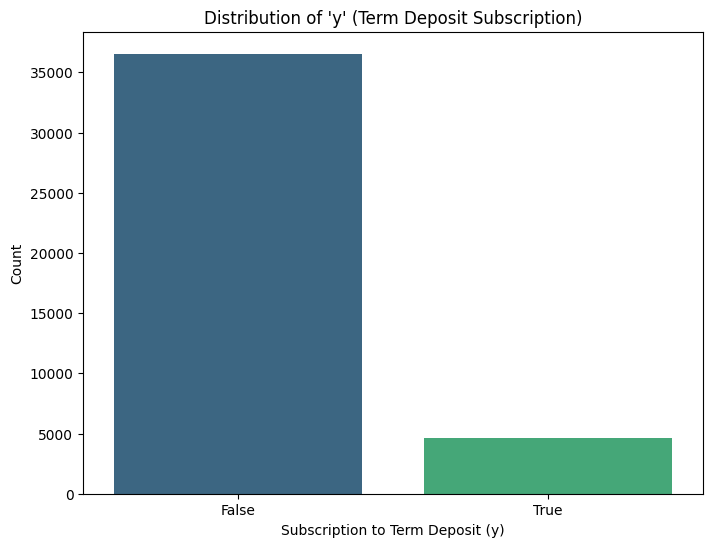

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for 'y' column to show the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='y_yes', palette='viridis')
plt.title("Distribution of 'y' (Term Deposit Subscription)")
plt.xlabel("Subscription to Term Deposit (y)")
plt.ylabel("Count")
plt.show()

<ipython-input-76-cad4dc0a001d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


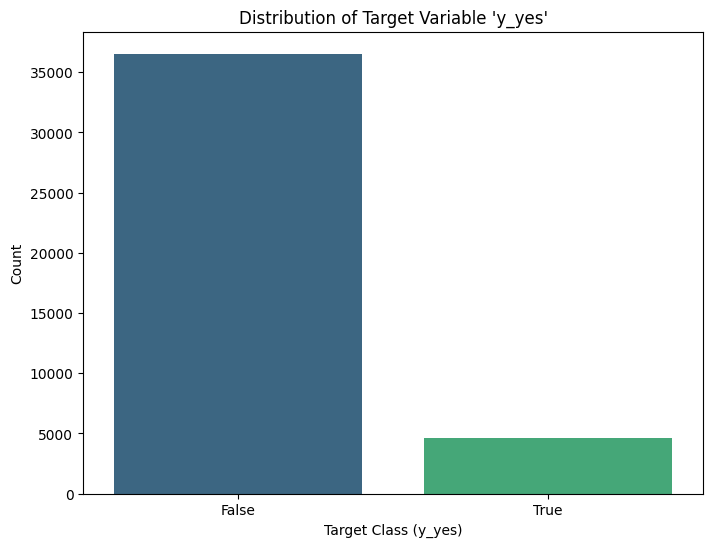

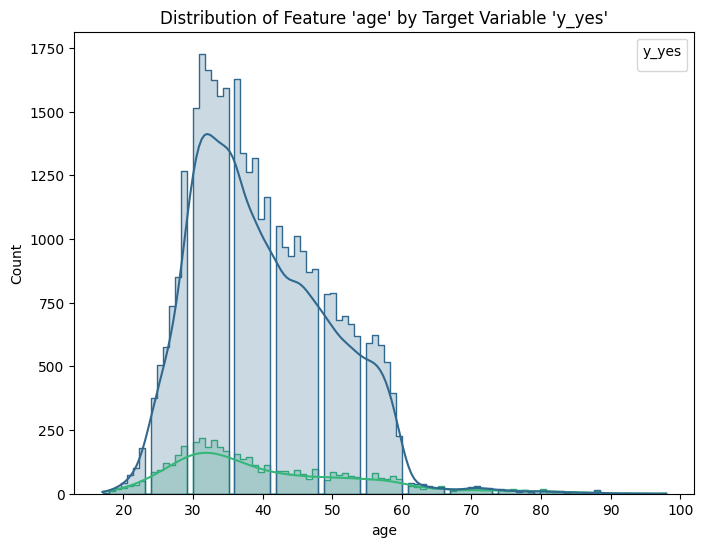

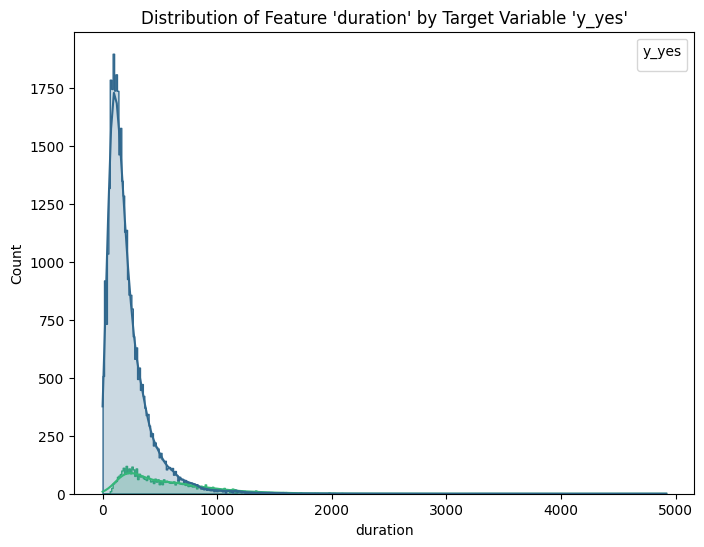

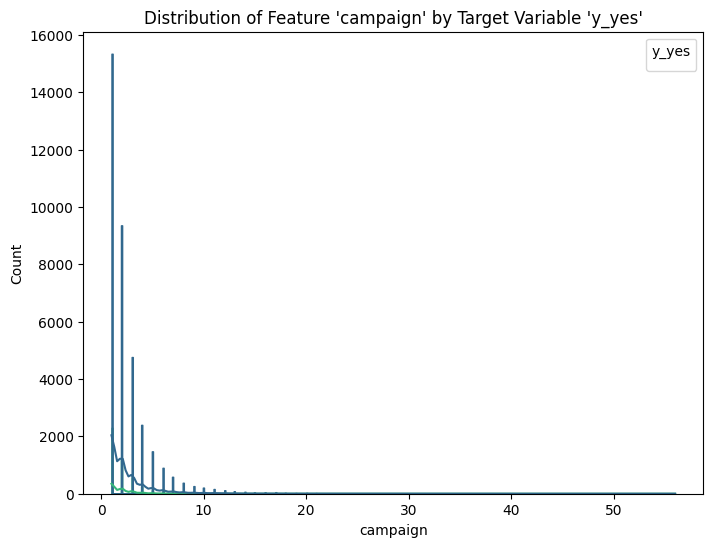

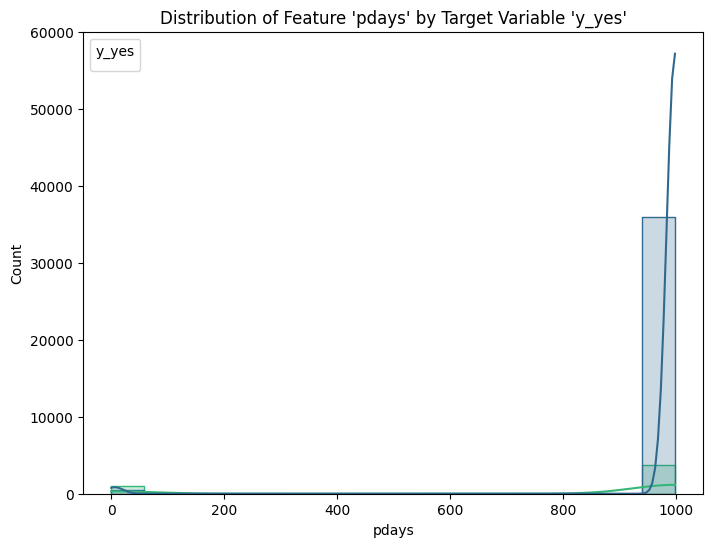

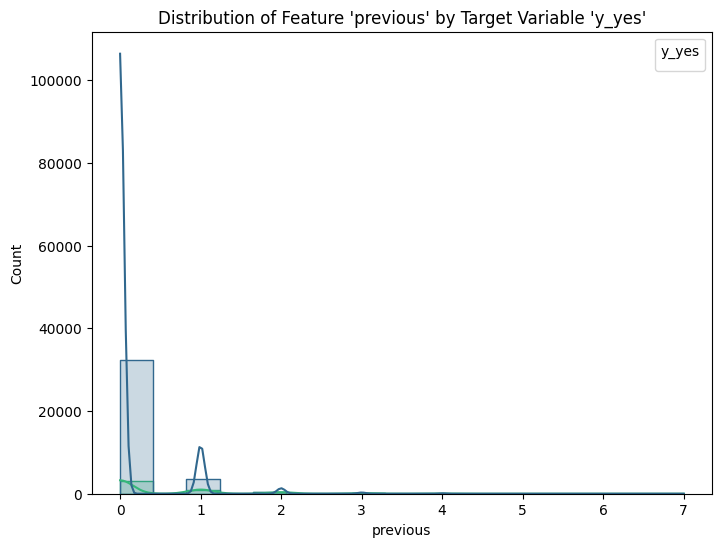

In [76]:
# Separate features and target variable
X = data.drop('y_yes', axis=1)
y = data['y_yes']

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title("Distribution of Target Variable 'y_yes'")
plt.xlabel("Target Class (y_yes)")
plt.ylabel("Count")
plt.show()

# Display distribution for each feature grouped by target variable y_yes
# Choosing a few features for visualization
sample_features = X.columns[:5] #features

for feature in sample_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=feature, hue=y, kde=True, palette='viridis', element="step")
    plt.title(f"Distribution of Feature '{feature}' by Target Variable 'y_yes'")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='y_yes')
    plt.show()

#2- Splitting the dataset into training and test datasets at a 70%/30% ratio

In [78]:
# Define features (X) and target (y)
X = data.drop('y_yes', axis=1)  # 'y_yes' is the indicator variable for 'y'
y = data['y_yes']  # Target variable as binary (1 for 'yes', 0 for 'no')

# Split the dataset into training and testing sets (70% training, 30% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm data preparation by checking shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28831, 53), (12357, 53), (28831,), (12357,))

#3- Run all algorithms with default values and report their model performance on the following metrics: -
i. Accuracy

ii. Precision

iii. Recall

iv. F1 Harmonic Mean

In [79]:
# Import necessary libraries for classifiers and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models with default settings
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.912276,0.901580,0.912276,0.903235
Naive Bayes,0.748159,0.890250,0.748159,0.791921
K-Nearest Neighbors,0.898114,0.881966,0.898114,0.885739
Decision Tree,0.889536,0.891809,0.889536,0.890635
Random Forest,0.914947,0.906553,0.914947,0.908801
XGBoost,0.913652,0.908336,0.913652,0.910450


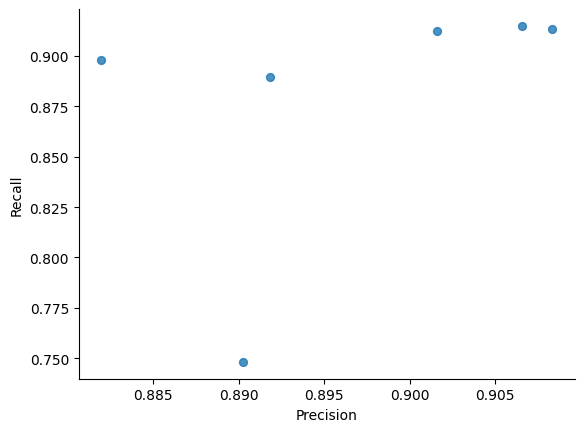

In [89]:
# @title Precision vs Recall

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1200x800 with 0 Axes>

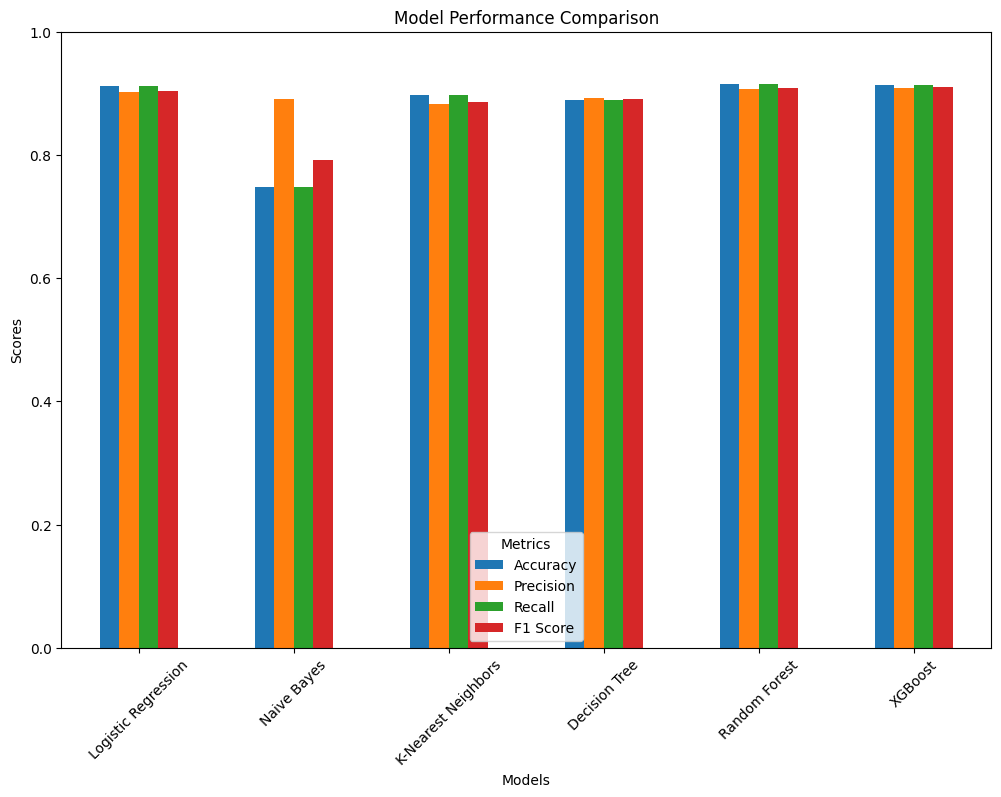

In [80]:
 #Plot the metrics for each model in a grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set figure size
plt.figure(figsize=(12, 8))

# Plot each metric for each model
results_df[metrics].plot(kind='bar', figsize=(12, 8), rot=45)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(title="Metrics")
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better comparison
plt.show()

#4- Generate Classification Report (for each model) including Confusion Matrices, ROC Curves, and AUCs

In [81]:
# Generating classification reports for each model
from sklearn.metrics import classification_report

# Dictionary to store classification reports for each model
classification_reports = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    # Convert report to DataFrame and save for each model
    classification_reports[model_name] = pd.DataFrame(report).T

# Display each classification report for precision, recall, and F1 score analysis
for model_name, report_df in classification_reports.items():
    print(f"Classification Report for {model_name}")
    print(report_df)
    print("\n" + "="*40 + "\n")


Classification Report for Logistic Regression
              precision    recall  f1-score       support
False          0.930263  0.974198  0.951724  10968.000000
True           0.675086  0.423326  0.520354   1389.000000
accuracy       0.912276  0.912276  0.912276      0.912276
macro avg      0.802675  0.698762  0.736039  12357.000000
weighted avg   0.901580  0.912276  0.903235  12357.000000


Classification Report for Naive Bayes
              precision    recall  f1-score       support
False          0.967285  0.741338  0.839372  10968.000000
True           0.281954  0.802016  0.417228   1389.000000
accuracy       0.748159  0.748159  0.748159      0.748159
macro avg      0.624620  0.771677  0.628300  12357.000000
weighted avg   0.890250  0.748159  0.791921  12357.000000


Classification Report for K-Nearest Neighbors
              precision    recall  f1-score       support
False          0.920048  0.969457  0.944107  10968.000000
True           0.581250  0.334773  0.424852   1389.000

To verify if the F1 scores for y = yes (subscription) across all models are close to or above 0.8, we need to specifically extract the F1 scores for the positive class (y = yes) from each classification report.

In [82]:
# Display one classification report to check the exact label for `y = yes`
print("Sample classification report for one model:")
print(classification_reports[list(classification_reports.keys())[0]])


Sample classification report for one model:
              precision    recall  f1-score       support
False          0.930263  0.974198  0.951724  10968.000000
True           0.675086  0.423326  0.520354   1389.000000
accuracy       0.912276  0.912276  0.912276      0.912276
macro avg      0.802675  0.698762  0.736039  12357.000000
weighted avg   0.901580  0.912276  0.903235  12357.000000


In [83]:
# Dictionary to store the F1 scores for `y = yes` across all models
f1_scores_yes_subscription = {}

# Extract F1 scores for the `y = yes` class from each model's classification report
for model_name, report_df in classification_reports.items():
    # Check if `yes` is in the index (i.e., report_df) and get its F1 score
    if 'True' in report_df.index:  # Assuming `1` represents `y = yes` after label encoding
        f1_yes = report_df.loc['True', 'f1-score']
        f1_scores_yes_subscription[model_name] = f1_yes

# Display F1 scores for the positive class (y = yes) across all models
f1_scores_df = pd.DataFrame.from_dict(f1_scores_yes_subscription, orient='index', columns=['F1 Score for y = yes'])
print(f1_scores_df)

# Check if all F1 scores are close to or above 0.8
f1_scores_df['Satisfactory'] = f1_scores_df['F1 Score for y = yes'] >= 0.8
print("\nSummary of F1 Score Evaluation for y = yes across all models:")
print(f1_scores_df)


                     F1 Score for y = yes
Logistic Regression              0.520354
Naive Bayes                      0.417228
K-Nearest Neighbors              0.424852
Decision Tree                    0.522478
Random Forest                    0.550482
XGBoost                          0.583691

Summary of F1 Score Evaluation for y = yes across all models:
                     F1 Score for y = yes  Satisfactory
Logistic Regression              0.520354         False
Naive Bayes                      0.417228         False
K-Nearest Neighbors              0.424852         False
Decision Tree                    0.522478         False
Random Forest                    0.550482         False
XGBoost                          0.583691         False


**CONFUSION MATRIX**

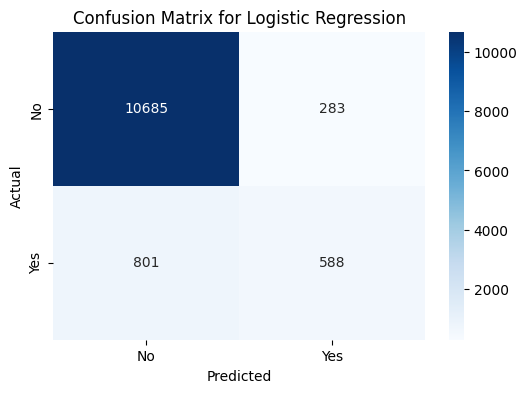

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     10968
        True       0.68      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357





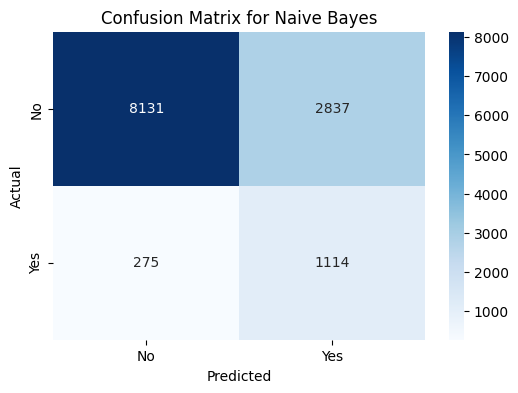

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

       False       0.97      0.74      0.84     10968
        True       0.28      0.80      0.42      1389

    accuracy                           0.75     12357
   macro avg       0.62      0.77      0.63     12357
weighted avg       0.89      0.75      0.79     12357





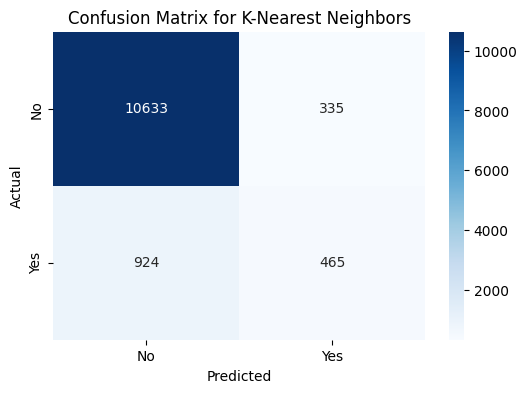

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94     10968
        True       0.58      0.33      0.42      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.65      0.68     12357
weighted avg       0.88      0.90      0.89     12357





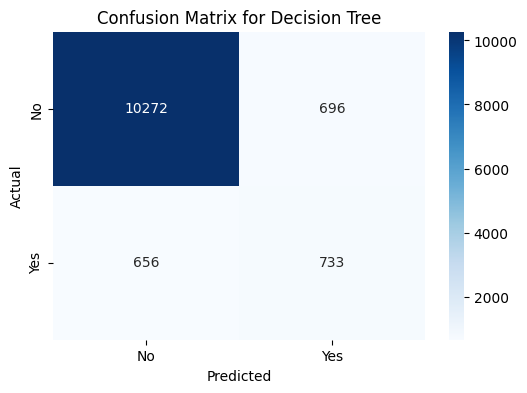

Classification Report for Decision Tree:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     10968
        True       0.51      0.53      0.52      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357





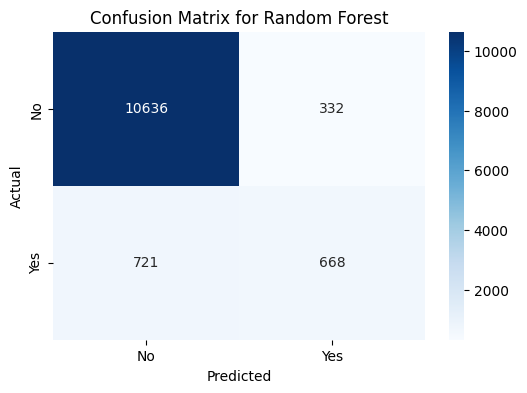

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     10968
        True       0.67      0.48      0.56      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357





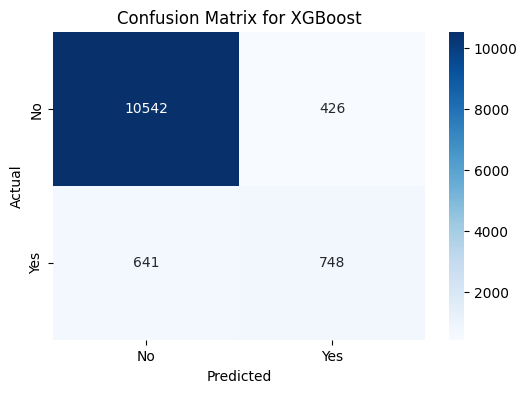

Classification Report for XGBoost:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95     10968
        True       0.64      0.54      0.58      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



Model Performance Summary:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.912276,0.675086,0.423326,0.520354
Naive Bayes,0.748159,0.281954,0.802016,0.417228
K-Nearest Neighbors,0.898114,0.581250,0.334773,0.424852
Decision Tree,0.890588,0.512946,0.527718,0.520227
Random Forest,0.914785,0.668000,0.480922,0.559230
XGBoost,0.913652,0.637138,0.538517,0.583691


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Generate and display confusion matrices and collect performance metrics for each model
for model_name, model in models.items():
    # Train the model and predict on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Collect performance metrics for further analysis
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=True, average='binary')  # Assuming 'yes' represents the positive class
    recall = recall_score(y_test, y_pred, pos_label=True, average='binary')
    f1 = f1_score(y_test, y_pred, pos_label=True, average='binary')

    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print the classification report for each model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['False', 'True']))
    print("\n" + "="*50 + "\n")

# Display performance metrics in a summary DataFrame
import pandas as pd

metrics_df = pd.DataFrame(evaluation_metrics).T
print("Model Performance Summary:")
display(metrics_df)


**ROC CURVES AND AUC CURVES**

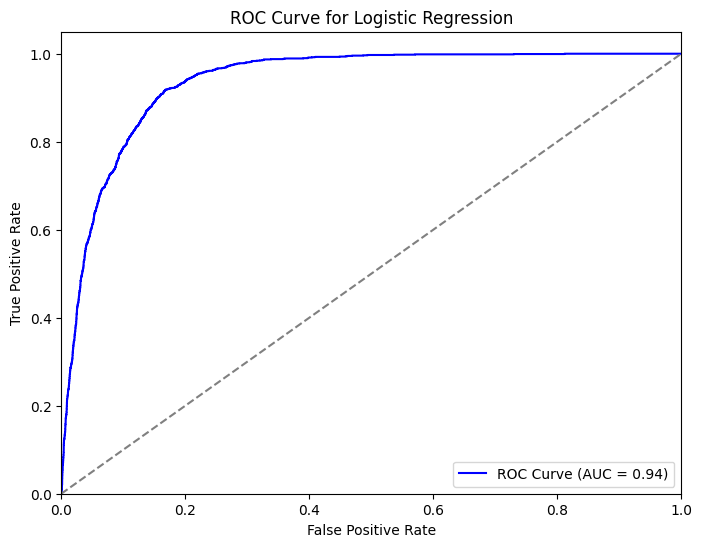

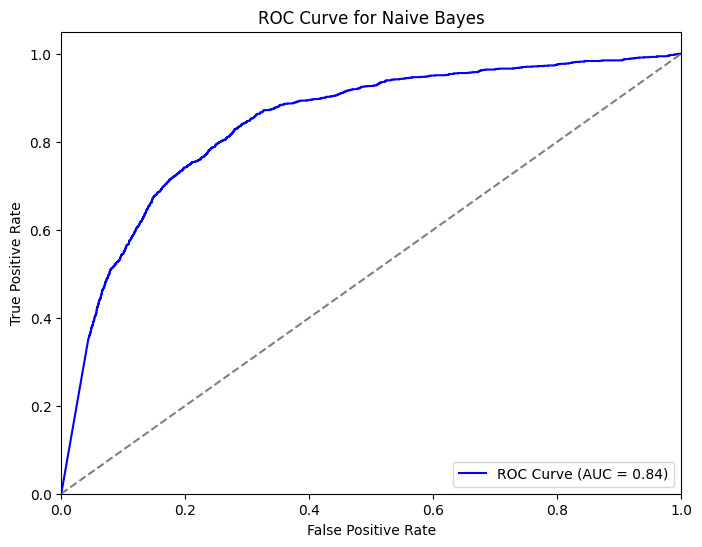

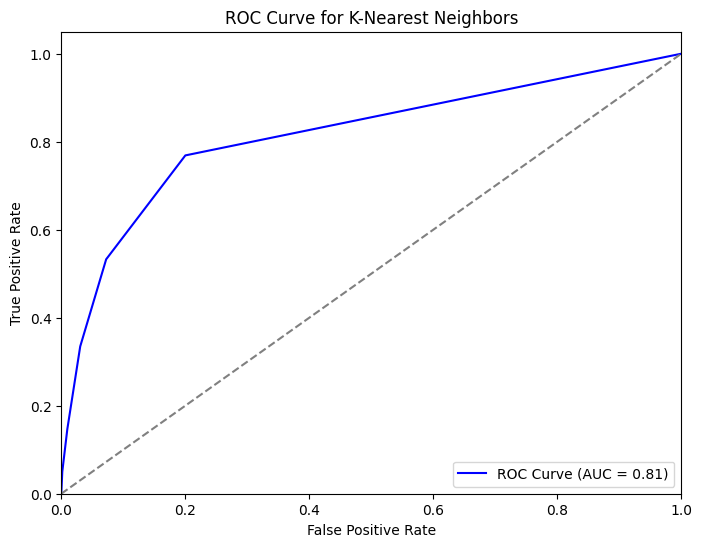

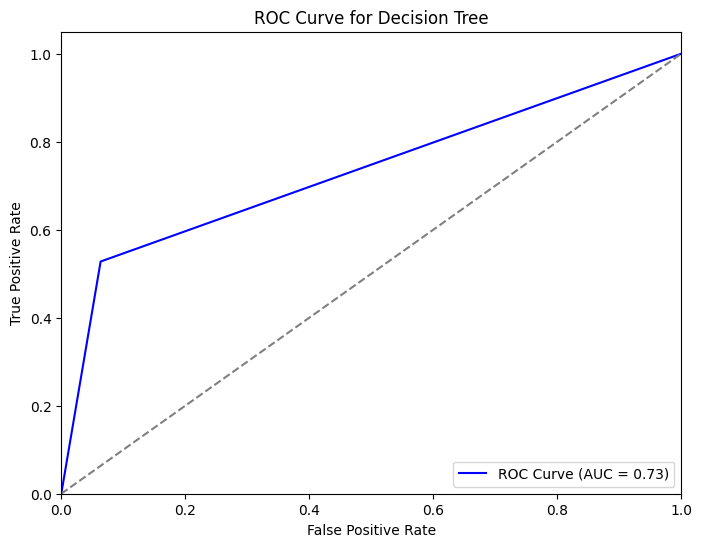

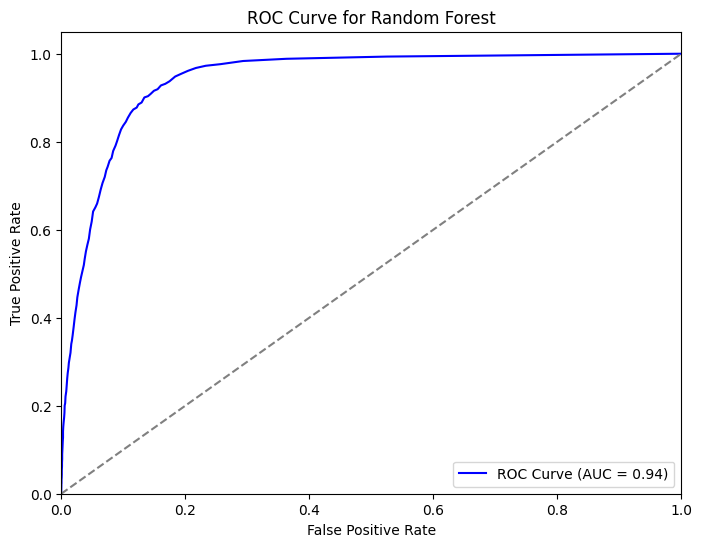

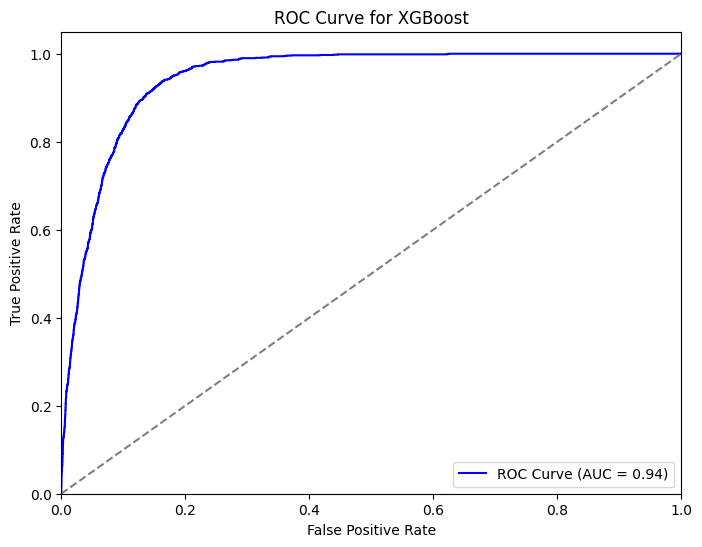

In [86]:
# Import necessary libraries for ROC and AUC analysis
from sklearn.metrics import roc_curve, auc

# Plot ROC curves and calculate AUC for each model that supports probability predictions
for model_name, model in models.items():
    # Check if the model has predict_proba attribute (some models don't support probability estimates)
    if hasattr(model, "predict_proba"):
        # Get the probabilities for the positive class
        y_proba = model.predict_proba(X_test)[:, 1]
        # Compute ROC curve and AUC score
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"{model_name} does not support probability predictions and is skipped for ROC and AUC analysis.")


In [87]:
# Adjust threshold for a model (e.g., Random Forest)
# Experimenting with different thresholds and print precision and recall for each
from sklearn.metrics import precision_score, recall_score

# Assuming Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

# Experiment with different thresholds
thresholds = [0.3, 0.5, 0.7]  # Adjust these based on desired trade-off
for threshold in thresholds:
    y_pred_adjusted = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n" + "="*20 + "\n")


Threshold: 0.3
Precision: 0.55
Recall: 0.79


Threshold: 0.5
Precision: 0.67
Recall: 0.50


Threshold: 0.7
Precision: 0.79
Recall: 0.20




#5- Rerun some of the models by tuning some hyperparameters.



In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# 2. Hyperparameter tuning for XGBoost using GridSearchCV
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                               xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Display the best parameters for each model
best_rf_params = rf_grid_search.best_params_
best_xgb_params = xgb_grid_search.best_params_

best_rf_params, best_xgb_params


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50})

In [47]:
# 2. Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                               xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Display the best parameters for XGBoost
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best accuracy for XGBoost:", xgb_grid_search.best_score_)

# Evaluate the best models on the test set
print("\nEvaluating tuned models on the test set:")

# Random Forest Evaluation
rf_y_pred = best_rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# XGBoost Evaluation
xgb_y_pred = best_xgb_model.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best accuracy for XGBoost: 0.9171032561079127

Evaluating tuned models on the test set:

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     10968
        True       0.68      0.48      0.56      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.72      0.76     12357
weighted avg       0.91      0.92      0.91     12357


XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.96     10968
        True       0.70      0.54      0.61      1389

    accuracy                           0.92     12357
   macro avg       0.82      0.75      0.78     12357
weighted avg       0.92      0.92      0.92     12357

